In [1]:
import pandas as pd
import numpy as np

***Data Description***

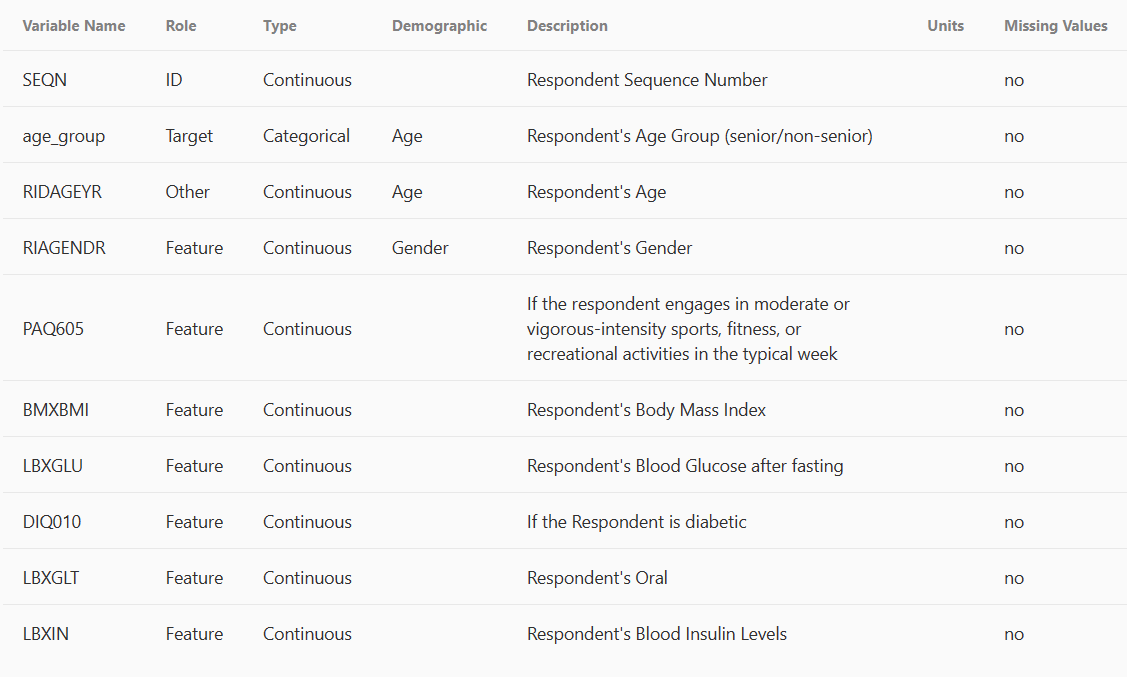

### import data set

In [2]:
nhanes_df = pd.read_csv("NHANES_age_prediction.csv")
nhanes_df.head(-5)

SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1     73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2     73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3     73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4     73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   
...       ...       ...       ...       ...     ...     ...     ...     ...   
2268  83692.0    Senior      68.0       1.0     2.0    19.1    89.0     2.0   
2269  83694.0     Adult      36.0       2.0     2.0    25.3    99.0     2.0   
2270  83699.0     Adult      37.0       2.0     2.0    20.8    83.0     2.0   
2271  83702.0    Senior      80.0       2.0     2.0    27.9   111.0     2.0   
2272  83707.0     Adult      18.0       1.0     2.0    22.5    98.0     2.0   

      LBXGLT  LBXIN  
0      150.0  14.91  
1       80.0   3.85  
2       68.0   6.14  
3       84.0  16.15  
4       81.0  10.92  
...      ...    ...  
2268   136.0   1.56  
2269   128.0  20.72  
2270   113.0   1.93  
2271    72.0  13.91  
2272    79.0   3.51  

[2273 rows x 10 columns]

In [3]:
nhanes_df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

### Characterisation of the data set

In [4]:
# Display basic information about the dataset
print("Dataset Size:", nhanes_df.shape)
print("Number of Attributes:", len(nhanes_df.columns))
print("Number of Observations:", len(nhanes_df))

# Check for missing values
missing_values = nhanes_df.isnull().sum()
if missing_values.any():
    print("Missing Values:\n", missing_values)
else:
    print("No Missing Values")

# Display additional information about the dataset
print("\nAdditional Information:")
print(nhanes_df.info())

Dataset Size: (2278, 10)
Number of Attributes: 10
Number of Observations: 2278
No Missing Values

Additional Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


### Data Preparation and EDA

In [5]:
len(nhanes_df["SEQN"].unique())

2278

In [6]:
# SEQN sutunu id oldugu icin ve idler unique deger oldugu icin bu bilgiyi kullanamaycagiz bu yuzden siliyoruz

nhanes_df = nhanes_df.drop("SEQN", axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

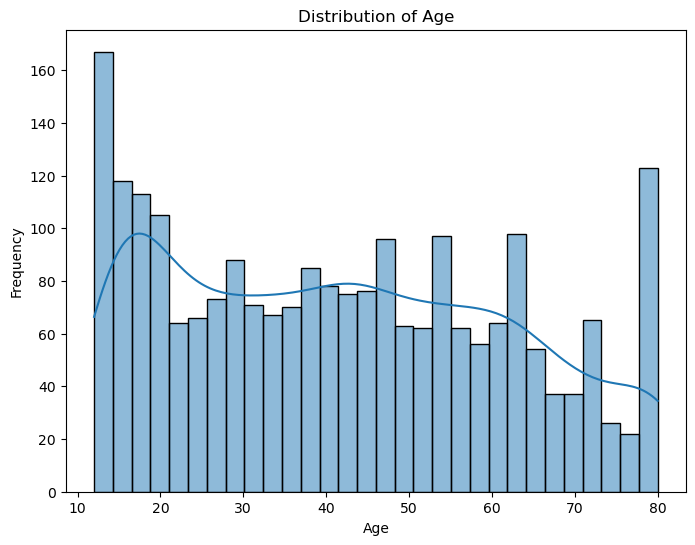

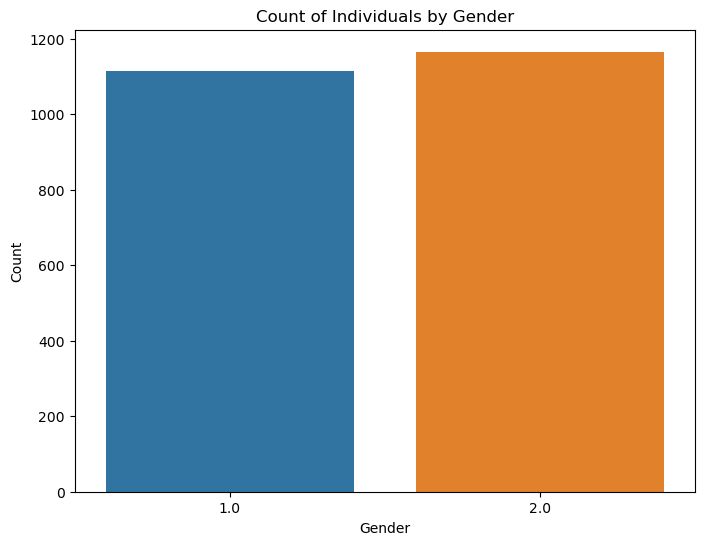

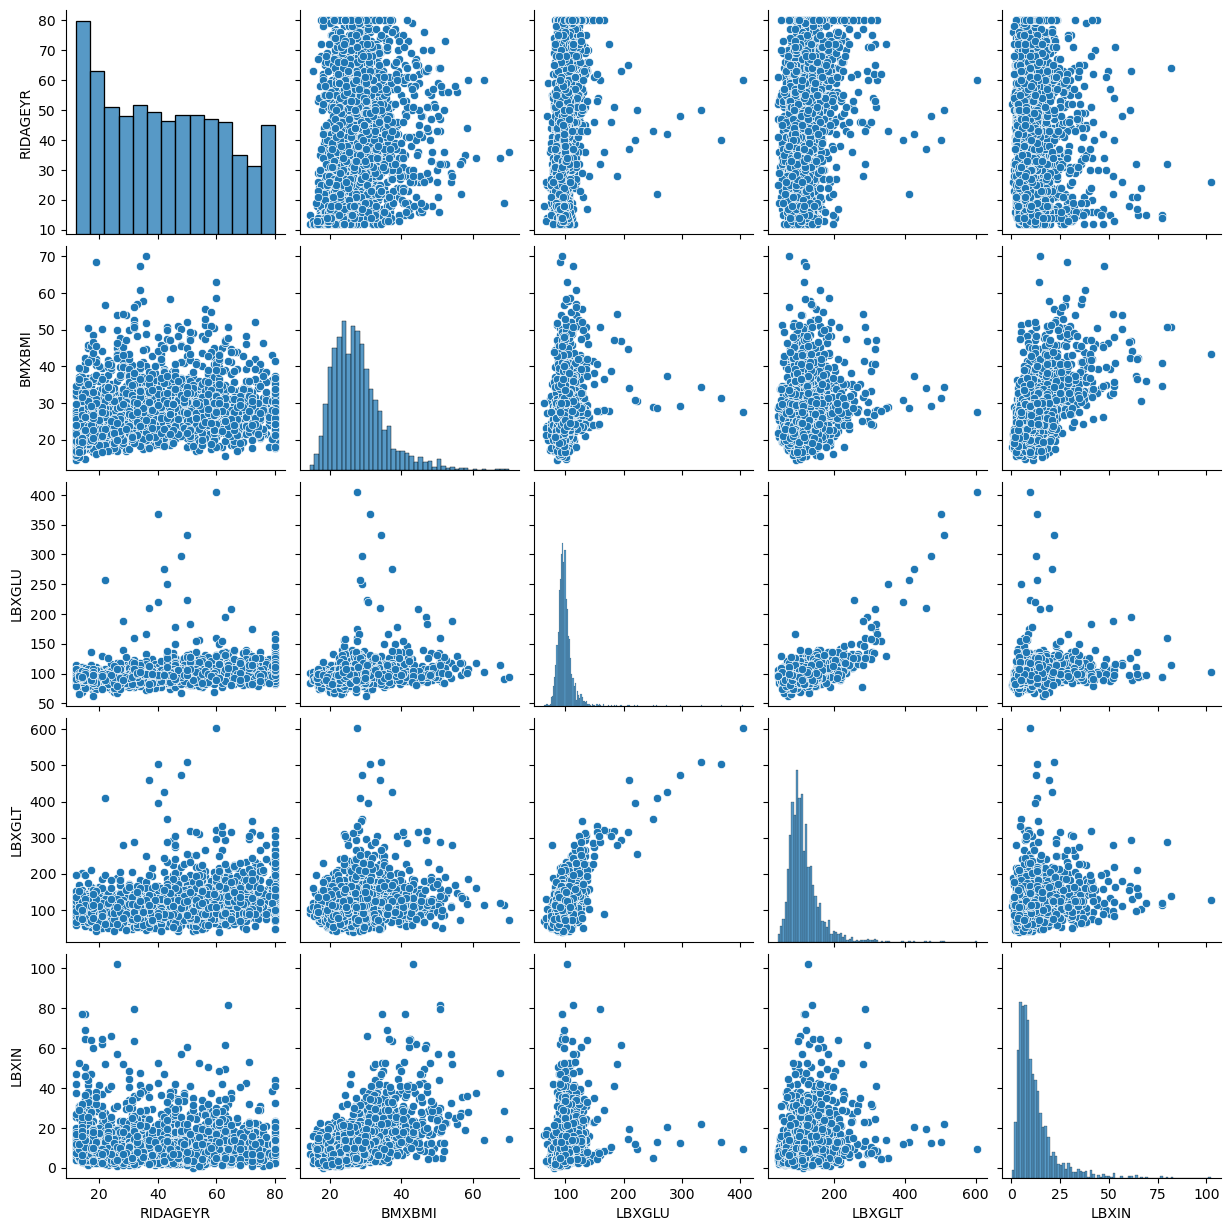

In [8]:
# EDA Visualizations
# Example 1: Histogram of a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(nhanes_df['RIDAGEYR'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example 2: Count plot of a categorical variable
plt.figure(figsize=(8, 6))
sns.countplot(x='RIAGENDR', data=nhanes_df)
plt.title('Count of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Example 3: Pairplot for numerical variables
numerical_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

sns.pairplot(nhanes_df[numerical_columns])
plt.show()

## Encoding, Scaling, and Feature Engineering

### Using Label Encoding

Sadece bir sutunumuz kategorical verilere sahip ( age_group  ) bunun icin bu encoding uygulamasini yapmaktayiz

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

nhanes_df['age_group_encoded'] = label_encoder.fit_transform(nhanes_df['age_group'])

In [12]:
nhanes_df.head(-5)

age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  \
0        Adult      61.0       2.0     2.0    35.7   110.0     2.0   150.0   
1        Adult      26.0       2.0     2.0    20.3    89.0     2.0    80.0   
2        Adult      16.0       1.0     2.0    23.2    89.0     2.0    68.0   
3        Adult      32.0       1.0     2.0    28.9   104.0     2.0    84.0   
4        Adult      38.0       2.0     1.0    35.9   103.0     2.0    81.0   
...        ...       ...       ...     ...     ...     ...     ...     ...   
2268    Senior      68.0       1.0     2.0    19.1    89.0     2.0   136.0   
2269     Adult      36.0       2.0     2.0    25.3    99.0     2.0   128.0   
2270     Adult      37.0       2.0     2.0    20.8    83.0     2.0   113.0   
2271    Senior      80.0       2.0     2.0    27.9   111.0     2.0    72.0   
2272     Adult      18.0       1.0     2.0    22.5    98.0     2.0    79.0   

      LBXIN  age_group_encoded  
0     14.91                  0  
1      3.85                  0  
2      6.14                  0  
3     16.15                  0  
4     10.92                  0  
...     ...                ...  
2268   1.56                  1  
2269  20.72                  0  
2270   1.93                  0  
2271  13.91                  1  
2272   3.51                  0  

[2273 rows x 10 columns]

### Scaling

let's check the data distribution

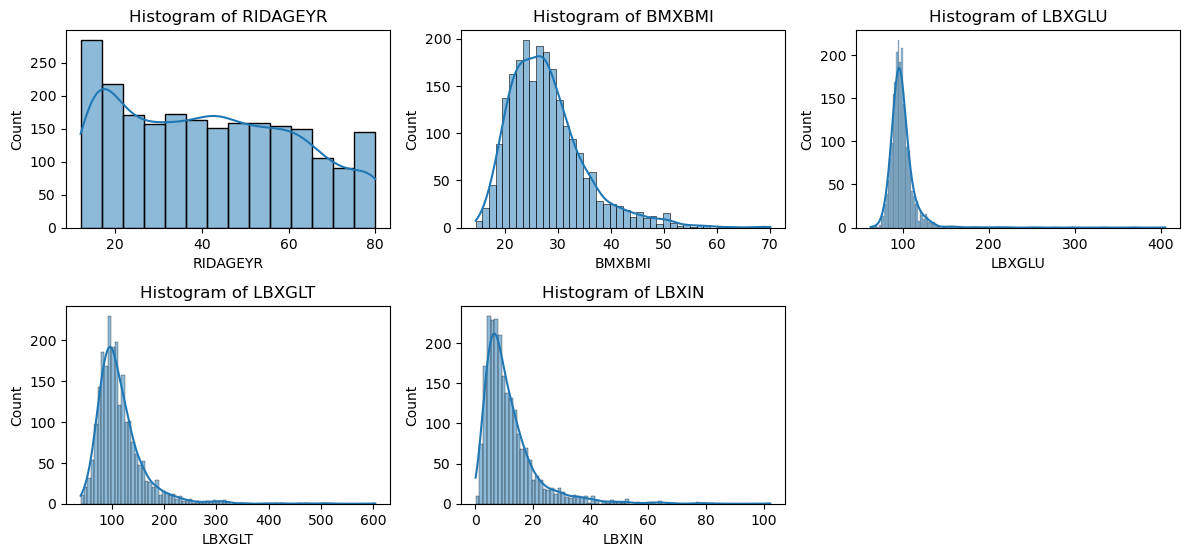

In [14]:
selected_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
subset_df = nhanes_df[selected_columns]

# Histogramlarını çizin
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=subset_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Yukarida da goruldugu gibi veri dagilimlari normal bu yuzden standart scaller kullanabiliriz.

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

# Standartlaştırmak istediğiniz özellikleri seçin (X olarak adlandırılmış varsayılan olarak kullanılır)
X = nhanes_df[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]

# Veriyi standartlaştırın ve yeni bir DataFrame'e atayın
X_standardized = scaler.fit_transform(X)

# Standartlaştırılmış veriyi içeren yeni bir DataFrame oluşturun
nhanes_scaled = pd.DataFrame(X_standardized, columns=X.columns)


In [18]:
nhanes_scaled.head()

RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
0  0.952979  0.977428  0.444672  1.068639  0.584085 -0.087553  0.744323   
1 -0.783849  0.977428  0.444672 -1.056270 -0.590024 -0.087553 -0.743427   
2 -1.280085 -1.023094  0.444672 -0.656125 -0.590024 -0.087553 -0.998470   
3 -0.486107 -1.023094  0.444672  0.130367  0.248625 -0.087553 -0.658413   
4 -0.188365  0.977428 -2.062661  1.096235  0.192715 -0.087553 -0.722174   

      LBXIN  
0  0.316487  
1 -0.821762  
2 -0.586084  
3  0.444103  
4 -0.094147

In [19]:
nhanes_scaled = pd.concat([nhanes_scaled, nhanes_df['age_group_encoded']], axis=1)

In [21]:
nhanes_scaled.head(-5)

RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
0     0.952979  0.977428  0.444672  1.068639  0.584085 -0.087553  0.744323   
1    -0.783849  0.977428  0.444672 -1.056270 -0.590024 -0.087553 -0.743427   
2    -1.280085 -1.023094  0.444672 -0.656125 -0.590024 -0.087553 -0.998470   
3    -0.486107 -1.023094  0.444672  0.130367  0.248625 -0.087553 -0.658413   
4    -0.188365  0.977428 -2.062661  1.096235  0.192715 -0.087553 -0.722174   
...        ...       ...       ...       ...       ...       ...       ...   
2268  1.300344 -1.023094  0.444672 -1.221847 -0.590024 -0.087553  0.446773   
2269 -0.287612  0.977428  0.444672 -0.366365 -0.030925 -0.087553  0.276744   
2270 -0.237989  0.977428  0.444672 -0.987279 -0.925484 -0.087553 -0.042059   
2271  1.895828  0.977428  0.444672 -0.007614  0.639995 -0.087553 -0.913456   
2272 -1.180838 -1.023094  0.444672 -0.752712 -0.086835 -0.087553 -0.764681   

         LBXIN  age_group_encoded  
0     0.316487                  0  
1    -0.821762                  0  
2    -0.586084                  0  
3     0.444103                  0  
4    -0.094147                  0  
...        ...                ...  
2268 -1.057439                  1  
2269  0.914428                  0  
2270 -1.019360                  0  
2271  0.213572                  1  
2272 -0.856753                  0  

[2273 rows x 9 columns]

## comparison of PCA and LDA

In [22]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
# PCA
# Bu durumda, hedef değişkenini çıkararak PCA'ya uyguluyoruz çünkü PCA, veri setinin varyansını maksimize etmeye odaklanır ve hedef bilgisine ihtiyaç duymaz.
X_scaled_pca = nhanes_scaled.drop('age_group_encoded', axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)

In [25]:
# LDA
lda = LinearDiscriminantAnalysis()

X_lda = nhanes_scaled.drop('age_group_encoded', axis=1)
y_lda = nhanes_scaled['age_group_encoded']

X_lda_transformed  = lda.fit_transform(X_lda, y_lda)

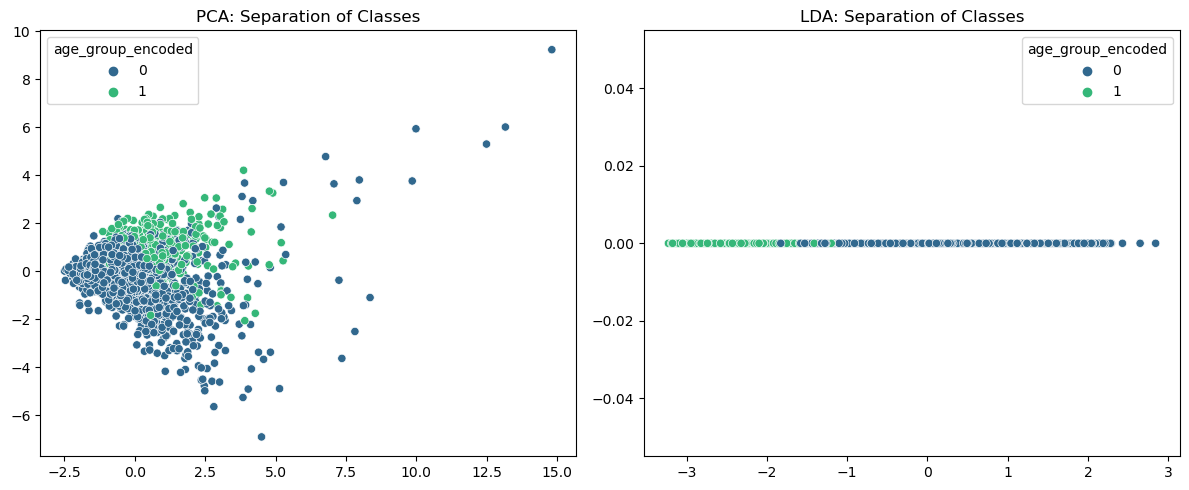

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# PCA Görselleştirmesi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_lda, palette='viridis')
plt.title('PCA: Separation of Classes')

# LDA Görselleştirmesi
plt.subplot(1, 2, 2)
# Eğer LDA sonucu tek boyutlu ise, sadece [:, 0] kullanılmalı
if X_lda_transformed.shape[1] == 1:
    sns.scatterplot(x=X_lda_transformed[:, 0], y=[0] * len(X_lda_transformed), hue=y_lda, palette='viridis')
else:
    sns.scatterplot(x=X_lda_transformed[:, 0], y=X_lda_transformed[:, 1], hue=y_lda, palette='viridis')

plt.title('LDA: Separation of Classes')

plt.tight_layout()
plt.show()


Linear Discriminant Analysis (LDA) ve Principal Component Analysis (PCA) arasındaki temel farkları kendi kelimelerinizle açıklamak ve elde ettiğiniz sonuçların normal ve anormal tekliflerin sınıflandırılması veya kümeleme analizi üzerindeki etkilerini tartışmak istediğinizde şu unsurlara odaklanabilirsiniz:

Amaç:

PCA: Veri setindeki değişkenler arasındaki en büyük varyansı bulma ve bu varyansı az sayıda yeni özelliğe yansıtma üzerine odaklanır.
LDA: Sınıflar arasındaki ayrımı maksimize etmeye odaklanır. Bu, sınıfları birbirinden mümkün olduğunca uzaklaştırmayı amaçlar.
Veri Dönüşümü:

PCA: Sınıf bilgisini dikkate almaz, yalnızca değişkenler arasındaki kovaryansı ele alır.
LDA: Sınıf bilgisini kullanarak, sınıflar arasındaki farkları vurgular ve sınıflar arasında daha fazla ayrım sağlar.
Boyut:

PCA: Tüm veri setinin varyansını korumak için kullanılabilir, bu nedenle orijinal veri seti boyutunda kalabilir.
LDA: Genellikle sınıfların sayısı kadar diskriminant fonksiyon üretir ve bu nedenle sınıf sayısına bağlı olarak boyut indirgeme yapar.
Sınıflandırma veya Kümeleme Analizi Üzerindeki Etkileri:

PCA: Genelde sınıflar arasındaki ayrımı gözetmez, bu nedenle sınıflandırma veya kümeleme amacıyla kullanılacaksa, sınıfları ayırt etme yeteneği sınırlı olabilir.
LDA: Sınıflar arasındaki ayrımı artırarak, sınıflandırma ve kümeleme için daha etkili olabilir. Eğer sınıflar arasındaki ayrım önemliyse, LDA tercih edilebilir.
Sonuçlarınızın normal ve anormal teklifleri sınıflandırmak veya kümelemek üzerindeki etkilerini değerlendirirken, eğer sınıflar arasındaki ayrım önemliyse ve sınıf bilgisini kullanmak istiyorsanız, LDA daha etkili olabilir. PCA, genel varyansı koruma odaklı olduğu için sınıf bilgisini dikkate almaz ve bu nedenle sınıflandırma veya kümeleme performansını etkileyebilir. Ancak, veri setinizin özelliklerine ve problem bağlamınıza bağlı olarak her iki yöntemi de denemeniz ve sonuçları dikkatlice değerlendirmeniz önemlidir.